In [1]:
# !pip install esparto

In [2]:
from pathlib import Path
from subprocess import run

import esparto as es
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('https://raw.githubusercontent.com/mwaskom/seaborn-data/master/iris.csv')

In [4]:
pic = "Iris_germanica_(Purple_bearded_Iris),_Wakehurst_Place,_UK_-_Diliff.jpg"
if not Path(pic).is_file:
    run("wget https://upload.wikimedia.org/wikipedia/commons/4/49/Iris_germanica_%28Purple_bearded_Iris%29%2C_Wakehurst_Place%2C_UK_-_Diliff.jpg")

In [5]:
df_content = es.DataFramePd(df.sample(10))

In [6]:
img_content = es.Image(pic).resize(0.06)


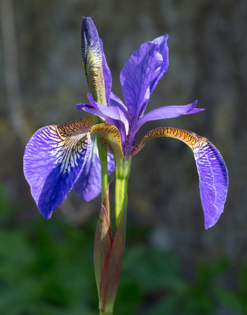

In [7]:
img_content

In [8]:
df_content

sepal_length,sepal_width,petal_length,petal_width,species
5.5,3.5,1.3,0.2,setosa
4.8,3.1,1.6,0.2,setosa
5.8,2.7,5.1,1.9,virginica
6.1,3.0,4.6,1.4,versicolor
6.6,2.9,4.6,1.3,versicolor
5.1,3.7,1.5,0.4,setosa
5.6,2.5,3.9,1.1,versicolor
5.7,2.5,5.0,2.0,virginica
6.1,2.9,4.7,1.4,versicolor
6.7,2.5,5.8,1.8,virginica


In [9]:
my_page = es.Page(title="Iris Report")

In [10]:
intro = es.Markdown("""
The Iris Dataset contains four features (length and width of sepals and petals) 
of 50 samples of three species of Iris (Iris setosa, Iris virginica and Iris 
versicolor). These measures were used to create a linear discriminant model to 
classify the species. The dataset is often used in data mining, classification 
and clustering examples and to test algorithms.
""")
my_page += intro + img_content
my_page += df_content

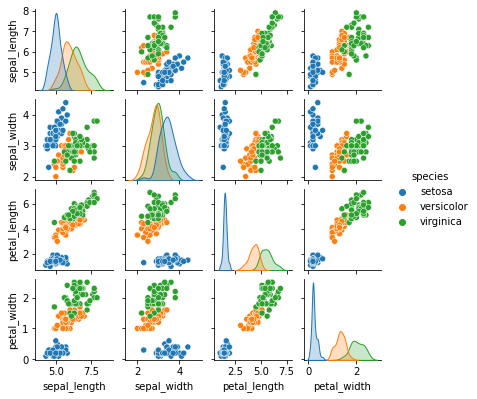

In [11]:
sns.pairplot(df, hue="species", height=1.4)
fig = plt.gcf()
pairplot = es.FigureMpl(fig)

In [12]:
my_page += (pairplot + es.Spacer())

In [13]:
print(my_page)

{'Iris Report': [{'Section': [{'Row': [{'Column': ['Markdown']},
                                       {'Column': ['Image']}]}]},
                 {'Section': [{'Row': [{'Column': ['DataFramePd']}]}]},
                 {'Section': [{'Row': [{'Column': ['FigureMpl']},
                                       {'Column': ['Spacer']}]}]}]}


In [14]:
my_page.content[0].title = "Header 1"
my_page.content[0].content[0].title = "Header 2"
my_page.content[0].content[0].content[0].title = "Header 3"

/home/domvwt/repos/esparto/esparto/_layout.py:336: UserWarning: Row titles are not rendered - for reference use only
  warn("Row titles are not rendered - for reference use only")


In [15]:
print(my_page)

{'Iris Report': [{'Header 1': [{'Header 2': [{'Header 3': ['Markdown']},
                                             {'Column': ['Image']}]}]},
                 {'Section': [{'Row': [{'Column': ['DataFramePd']}]}]},
                 {'Section': [{'Row': [{'Column': ['FigureMpl']},
                                       {'Column': ['Spacer']}]}]}]}


sepal_length,sepal_width,petal_length,petal_width,species
5.5,3.5,1.3,0.2,setosa
4.8,3.1,1.6,0.2,setosa
5.8,2.7,5.1,1.9,virginica
6.1,3.0,4.6,1.4,versicolor
6.6,2.9,4.6,1.3,versicolor
5.1,3.7,1.5,0.4,setosa
5.6,2.5,3.9,1.1,versicolor
5.7,2.5,5.0,2.0,virginica
6.1,2.9,4.7,1.4,versicolor
6.7,2.5,5.8,1.8,virginica

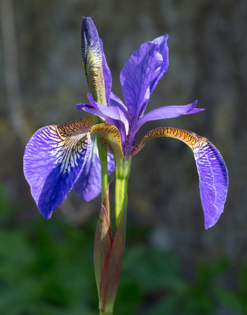
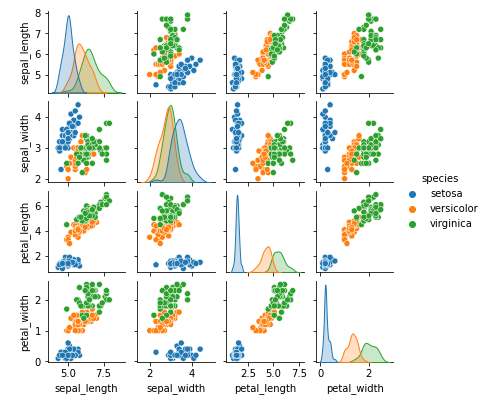

<class 'esparto._layout.Page'>: Iris Report

In [16]:
my_page

In [17]:
my_page.save("iris-report.html")